In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [3]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
for col in df_train.columns:
    print('column: {:>10}\t Percent of NaN {: .2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0])))

column: PassengerId	 Percent of NaN  0.00%
column:   Survived	 Percent of NaN  0.00%
column:     Pclass	 Percent of NaN  0.00%
column:       Name	 Percent of NaN  0.00%
column:        Sex	 Percent of NaN  0.00%
column:        Age	 Percent of NaN  19.87%
column:      SibSp	 Percent of NaN  0.00%
column:      Parch	 Percent of NaN  0.00%
column:     Ticket	 Percent of NaN  0.00%
column:       Fare	 Percent of NaN  0.00%
column:      Cabin	 Percent of NaN  77.10%
column:   Embarked	 Percent of NaN  0.22%


In [5]:
for col in df_test.columns:
    print('column: {:>10}\t Percent of NaN {: .2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0])))

column: PassengerId	 Percent of NaN  0.00%
column:     Pclass	 Percent of NaN  0.00%
column:       Name	 Percent of NaN  0.00%
column:        Sex	 Percent of NaN  0.00%
column:        Age	 Percent of NaN  20.57%
column:      SibSp	 Percent of NaN  0.00%
column:      Parch	 Percent of NaN  0.00%
column:     Ticket	 Percent of NaN  0.00%
column:       Fare	 Percent of NaN  0.24%
column:      Cabin	 Percent of NaN  78.23%
column:   Embarked	 Percent of NaN  0.00%


<AxesSubplot:>

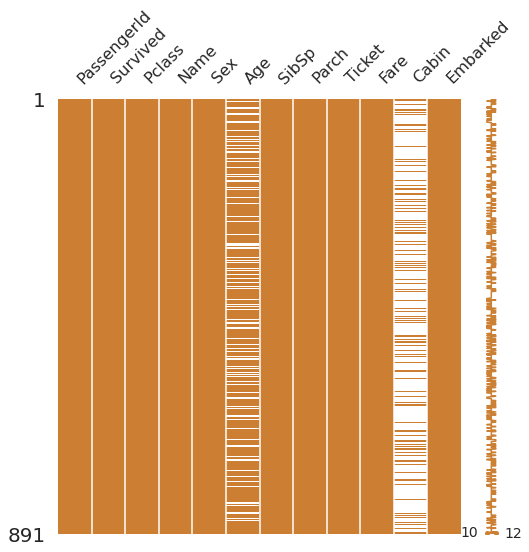

In [6]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

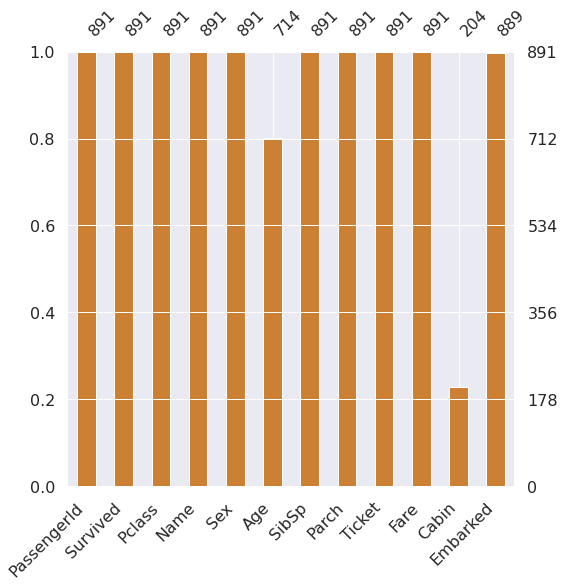

In [7]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<function matplotlib.pyplot.show(close=None, block=None)>

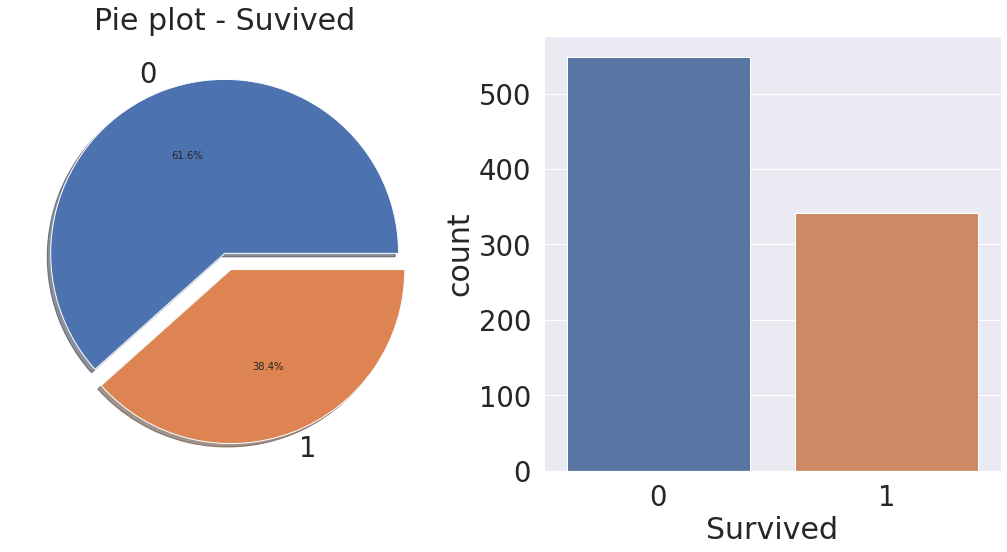

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))#1개의 행에 2개의 그림 사이즈는 가로 18, 높이 8

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True) #ax[i] 어느 위치에 그릴지 결정
ax[0].set_title('Pie plot - Suvived')
ax[0].set_ylabel('') #<- 다른거 추가하면 y축에 인자값이 출력됨.
sns.countplot('Survived', data=df_train, ax=ax[1]) #dataframe객체를 넣어주기전에 지정할 colume을 넣어준다.
#막대 그래프를 그린다.
plt.show

In [9]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
a = '당연히 Series 형' + str(type(df_train['Survived'].value_counts()))
print(a)

당연히 Series 형<class 'pandas.core.series.Series'>


<AxesSubplot:>

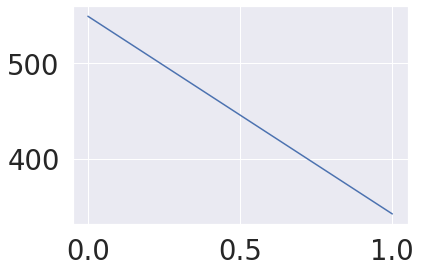

In [11]:
#series 여러개가 묶인거는 DataFrme
df_train['Survived'].value_counts().plot() #series객체는 plot()을 지원한다.

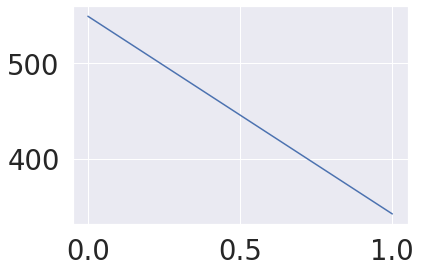

In [12]:
plt.plot(df_train['Survived'].value_counts()) #위와 같다.

<AxesSubplot:ylabel='Survived'>

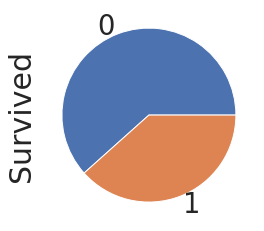

In [13]:
df_train['Survived'].value_counts().plot.pie()

<AxesSubplot:ylabel='Survived'>

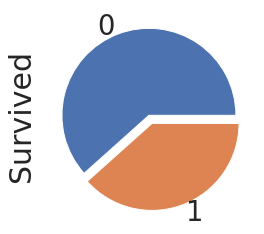

In [14]:
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1])

In [15]:
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)

<AxesSubplot:title={'center':'Pie plot - Suvived'}, ylabel='Survived'>

In [16]:
ax#ax는 방금전 f, ax = plt.subplots(1, 2, ..) <- 2개로 선언을 했기에 2개이다. [0] , [1]

array([<AxesSubplot:title={'center':'Pie plot - Suvived'}, ylabel='Survived'>,
       <AxesSubplot:xlabel='Survived', ylabel='count'>], dtype=object)

<AxesSubplot:ylabel='Survived'>

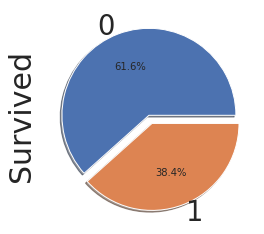

In [17]:
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True) #ax=ax[0]의 위치에 , shadow 그림자

In [18]:
df_train.shape #이제부터 해당 11개의 특성들이 어떤 상관관계가 존재하는지 알아보기

(891, 12)

# **> #Pclass**

In [19]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count() #Pclass는 1,2,3을 갖고있는데, 1, 2, 3은 Survived라는 값을 얼마나 갖고있는지. count는 말그대로 갯수를 말하는거기에 "Pclass의 비율에 의존적임."

,Survived
Pclass,
1,216
2,184
3,491


In [20]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']) #Pclass에 대해 묶어준다. 

In [21]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [22]:
df_train['Survived'].unique() #Survived가 갖고있는 값들

array([0, 1])

In [23]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [24]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass'>

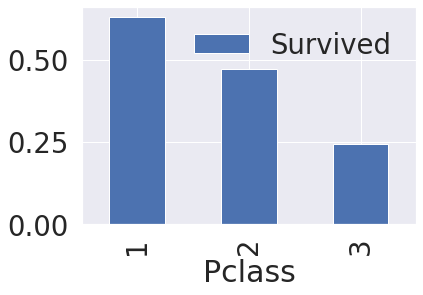

In [25]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar() #내림차순으로 'Survived'에 대하여 정
#여기서 해당평균이 생존률과 같음을 알수있다.

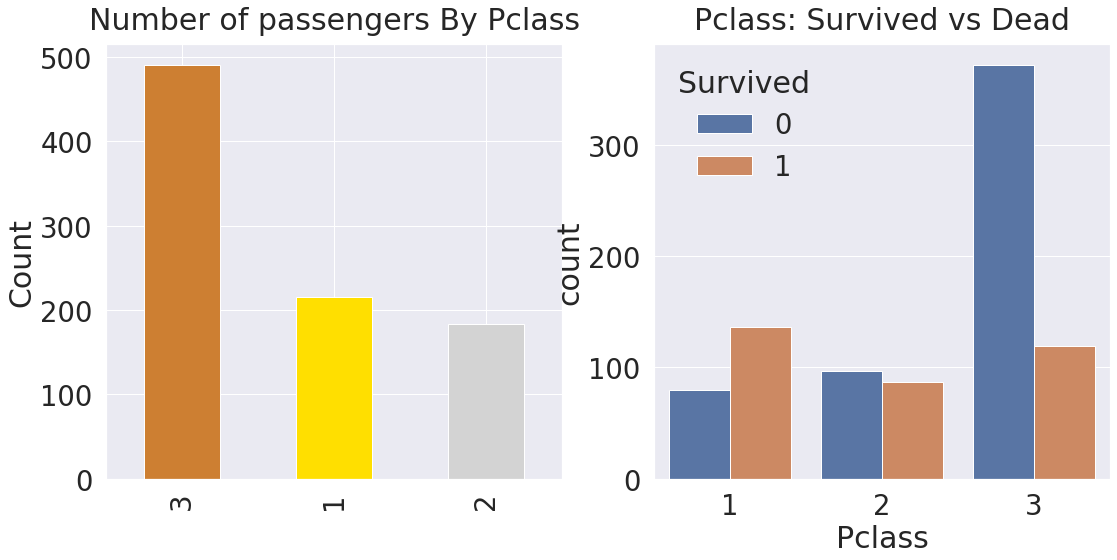

In [26]:
y_position = 1.02
f, ax = plt.subplots(1, 2 ,figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1]) # = df_train[['Pclass', 'Survived']].groupby(['Pclass']) 이거랑 같음 (0번 차트는 총합, 2번차트는 SUrvived 0, 1을 각각 나눠서 보여주는 차트)
#hue는 Pclass를 Survived로 나눠서 표현한다.
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

# > ******결론: Class가 높을수록 생존률이 높다.

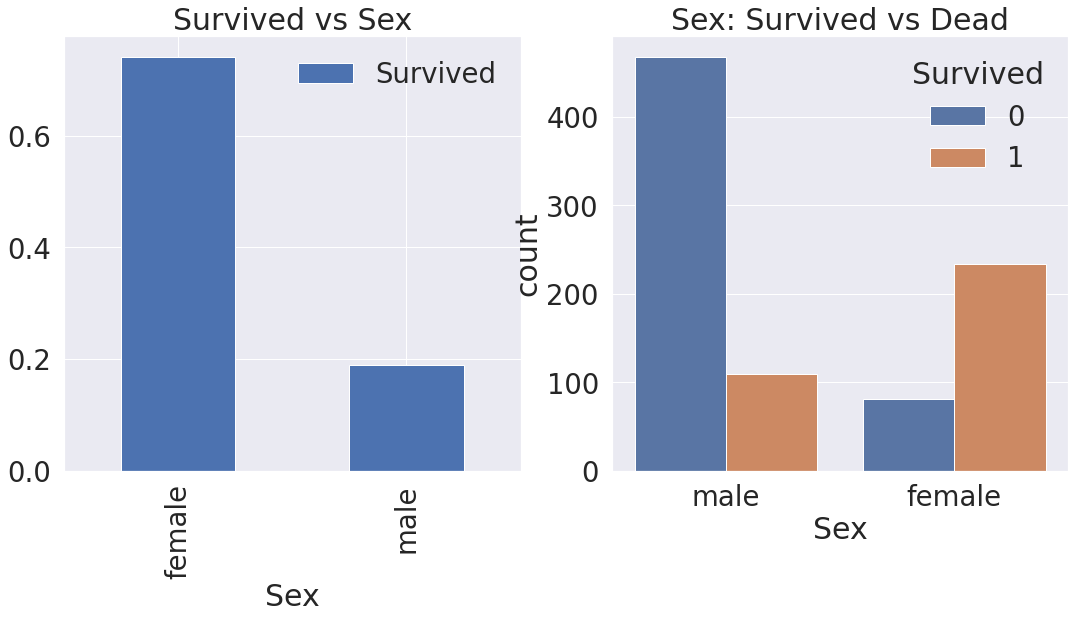

In [27]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

<AxesSubplot:xlabel='Sex'>

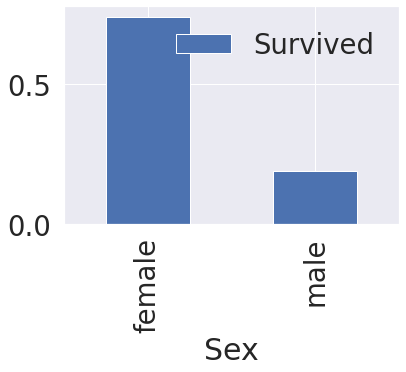

In [28]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar() #그림이 이상하게 나오는이유  figsize=(18, 8) 사이즈가 작아서

In [29]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [30]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=False).style.background_gradient(cmap='summer_r') #margins가 False일때

Survived,0,1
Sex,,
female,81,233
male,468,109


# # > ******# 이또한 생존률을 잘 나타낼 수 있다.

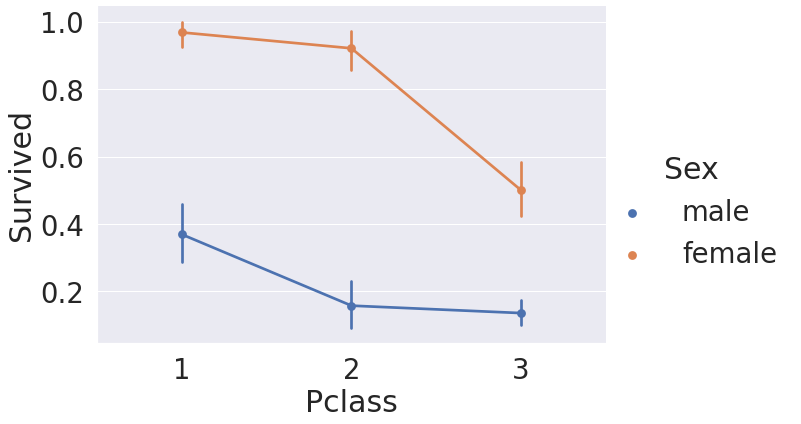

In [31]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)
#여기서 factorplot는 countplot보다 1개더 많은 특성을 표현가능하다.

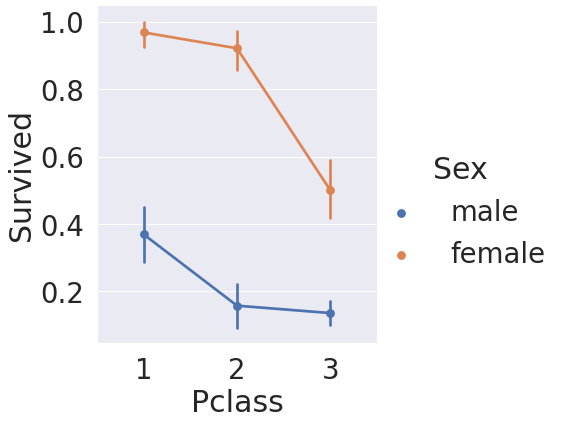

In [32]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1) #aspect는 폭임을 알수  있다.

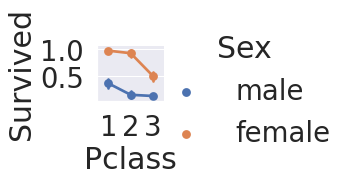

In [33]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=1, aspect=1.5) #전체 size를 조절한다는 걸 알 수 있다.

종합적으로 알수있는것.
-Lady first
-비싼 Class일수록 살 확률이 높다.

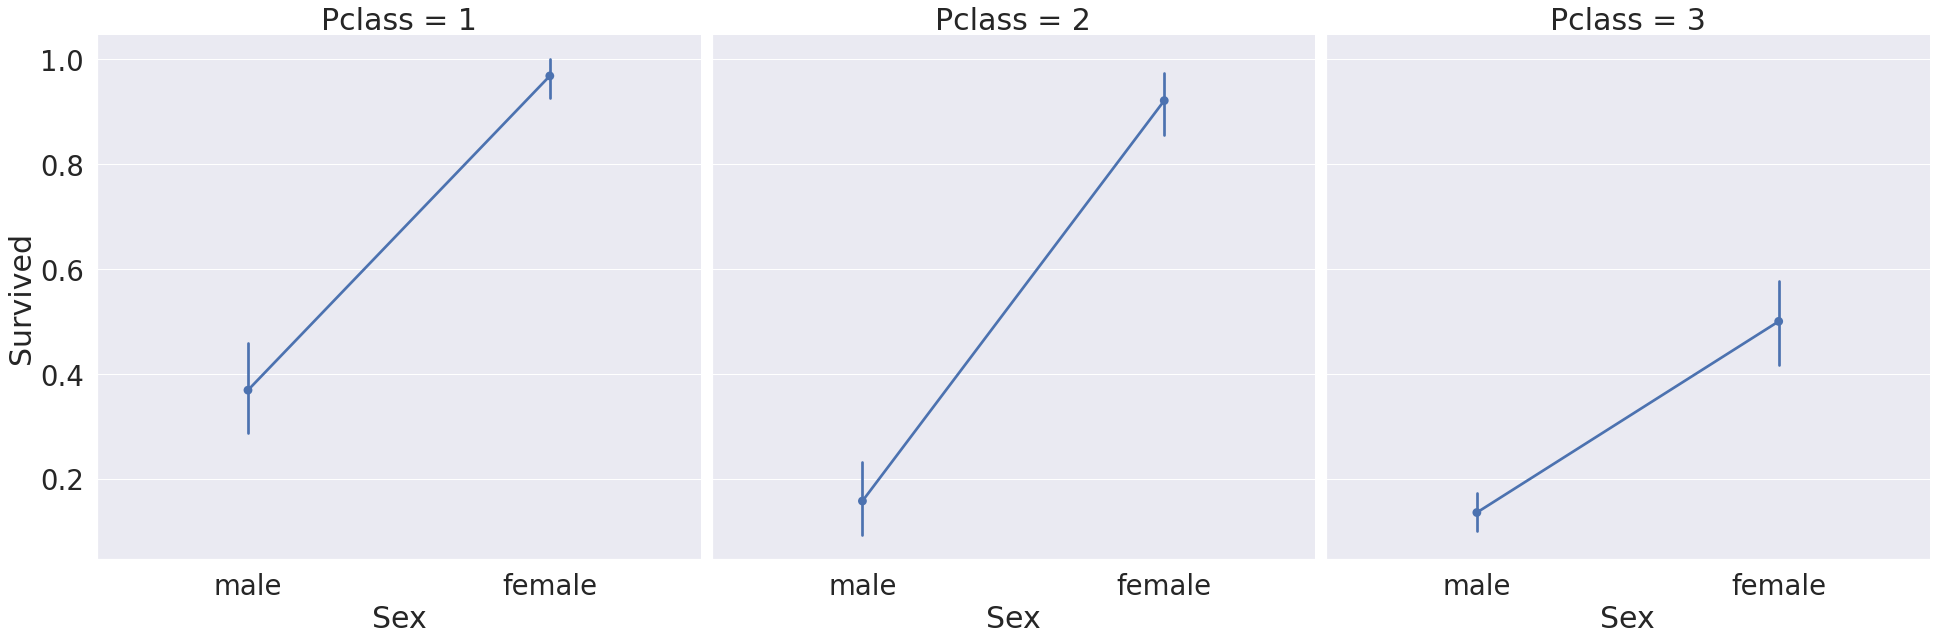

In [34]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satiration=.5,
              size=9, aspect=1) #col은 3개의 특성을 각각따로.

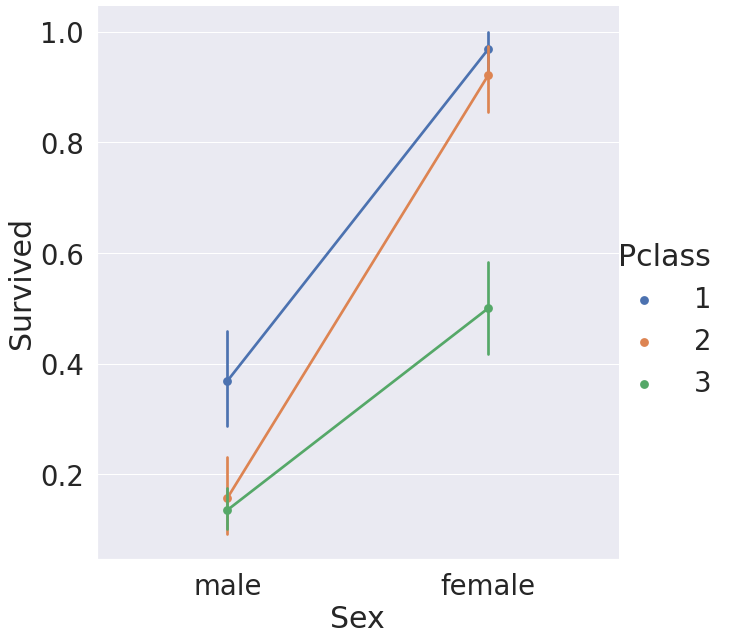

In [35]:
sns.factorplot(x='Sex', y='Survived', hue='Pclass', data=df_train, satiration=.5,
              size=9, aspect=1)# hue는 2개를 Pclass로 분류
#작대기 폭이 높을수록 애러가 높다. *에러바라고함.

# # # **AGE**

In [36]:
print('제일 나이 많은 탑승객 : {: .1f}'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {: .1f}'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {: .1f}'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 :  80.0
제일 어린 탑승객 :  0.4
탑승객 평균 나이 :  29.7


1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64


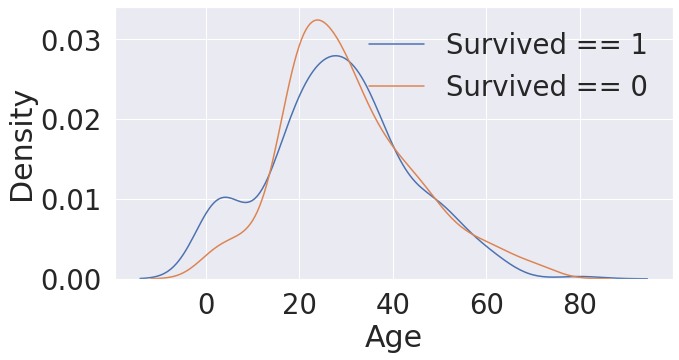

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
print(df_train[df_train['Survived'] == 1]['Age'])
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax) #이거 그리는 공식있
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

In [38]:
df_train[df_train['Survived'] == 1] #Survived가 1인 dataframe만 가져옴

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [39]:
df_train[df_train['Survived'] == 1]['Age']

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

<AxesSubplot:>

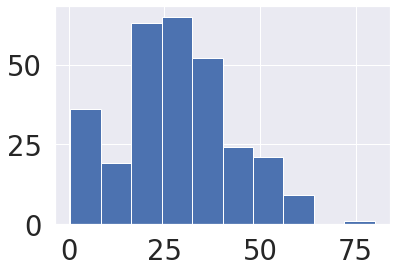

In [40]:
df_train[df_train['Survived'] == 1]['Age'].hist() #히스토그램을 부드럽게 그리는게 kdeplot이다.

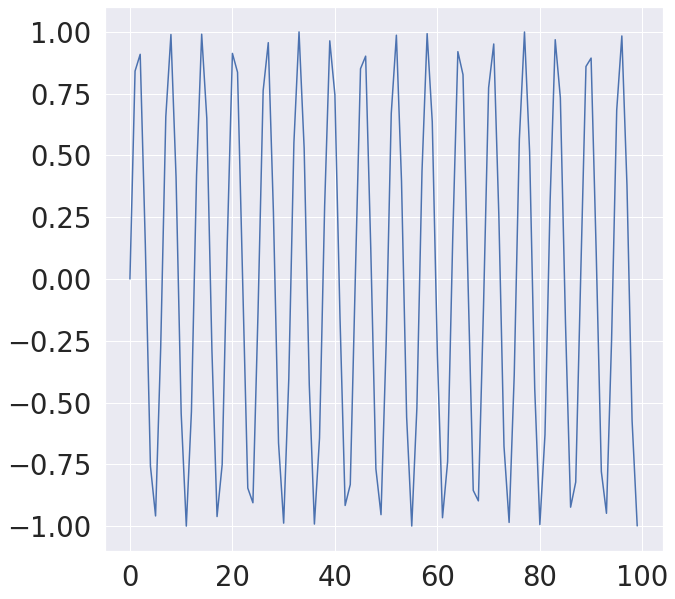

In [41]:
f, ax = plt.subplots(1, 1, figsize=(10, 10)) #도화지를 준비하는 방법 1
a = np.arange(100)
b = np.sin(a)
plt.plot(b)

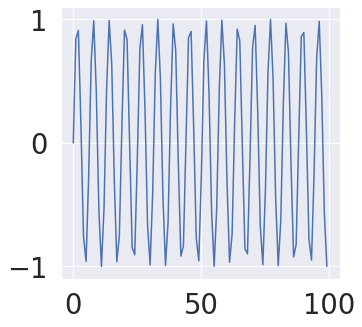

In [42]:
f = plt.figure(figsize=(5, 5)) #도화지를 준비하는 방법 2 <-얘는 ax를 받는게 아니라 그냥 도화지를 깐다.
a = np.arange(100)
b = np.sin(a)
plt.plot(b)

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

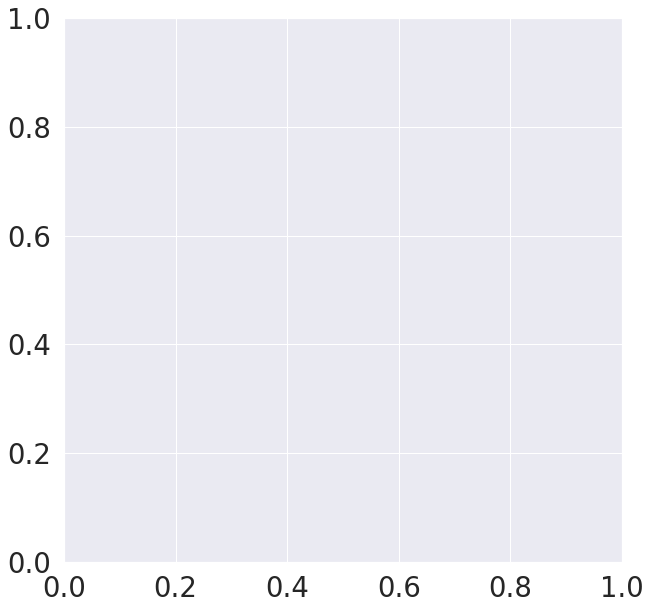

<Figure size 720x720 with 0 Axes>

In [43]:
f = plt.figure(figsize=(10, 10))
f, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.figure(figsize=(10, 10))
#이렇게 3가지 방법이 존재한다.

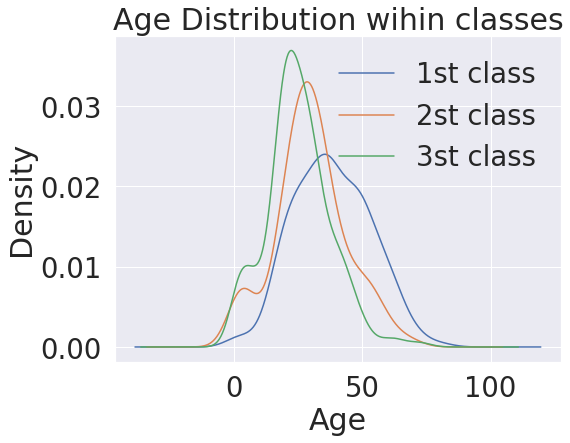

In [44]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')
plt.xlabel('Age')
plt.title('Age Distribution wihin classes')
plt.legend(['1st class', '2st class', '3st class'])

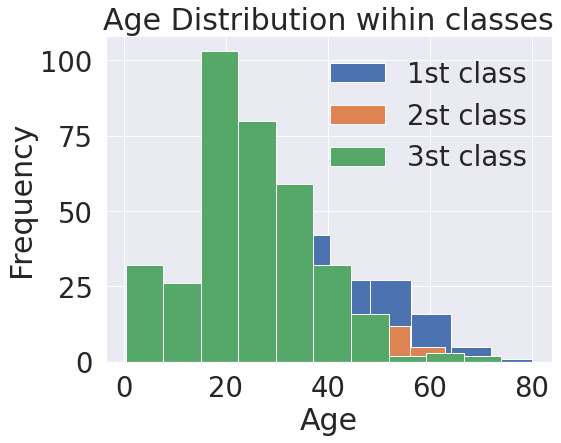

In [45]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='hist')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='hist')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='hist') 
plt.xlabel('Age') #라벨 선언 주의!
plt.title('Age Distribution wihin classes')
plt.legend(['1st class', '2st class', '3st class'])
#hist면 겹치는게 안보이는걸 알 수 있다.

Text(0.5, 0, 'sdf')

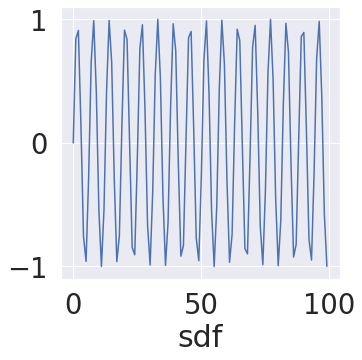

In [46]:
f, ax = plt.subplots(1, 1, figsize=(5, 5))
a = np.arange(100)
b = np.sin(a)

ax.plot(b)
ax.set_xlabel('sdf') # <-라벨 선언 방식이 다르다 도화지 방식마다.

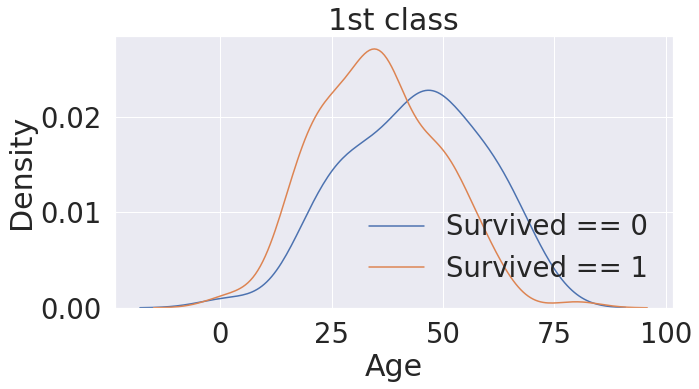

In [47]:
#생존, 사망 한사람들 중 pclass가 1인것 찾기.
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax=ax) #이거 그리는 공식있
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
plt.legend(['Survived == 0', 'Survived == 1'])
plt.title('1st class')
plt.show()

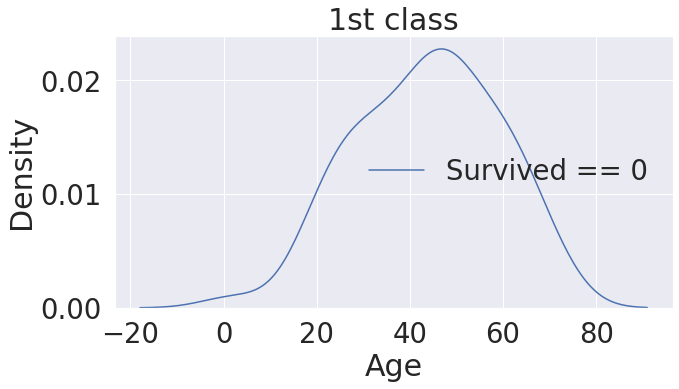

In [48]:
#생존, 사망 한사람들 중 pclass가 1인것 찾기.
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax=ax) #이거 그리는 공식있
#sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
plt.legend(['Survived == 0', 'Survived == 1'])
plt.title('1st class')
plt.show()

Text(0.5, 1.0, 'Age Distribution wihin classes')

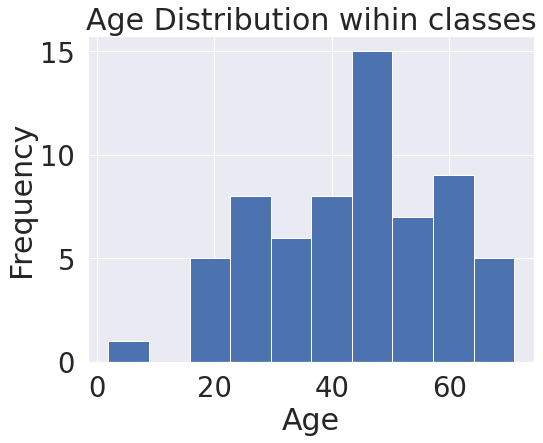

In [49]:
plt.figure(figsize=(8, 6))
df_train['Age'][(df_train['Pclass'] == 1) & (df_train['Survived'] == 0)].plot(kind='hist')
#df_train['Age'][(df_train['Pclass'] == 2) & (df_train['Survived'] == 0)].plot(kind='hist')
#df_train['Age'][(df_train['Pclass'] == 3) & (df_train['Survived'] == 0)].plot(kind='hist') 
plt.xlabel('Age') #라벨 선언 주의!
plt.title('Age Distribution wihin classes')
#plt.legend(['1st class', '2st class', '3st class'])
#해당 그래프를 근사한게 위의(위의 셀) 그래프이다! 계속 근사하기에 -까지 값이 간것이다!

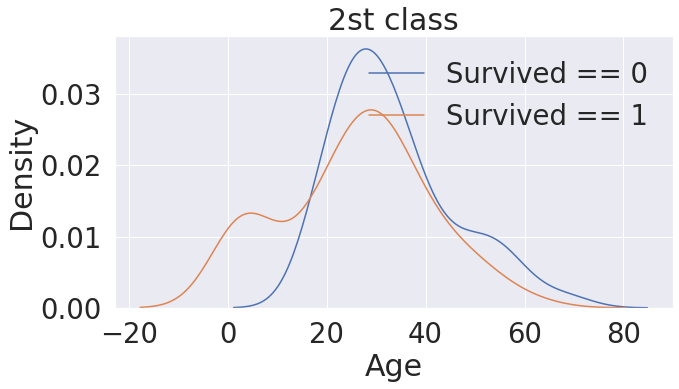

In [50]:
#생존, 사망 한사람들 중 pclass가 2인것 찾기.
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 2)]['Age'], ax=ax) #이거 그리는 공식있
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 2)]['Age'], ax=ax)
plt.legend(['Survived == 0', 'Survived == 1'])
plt.title('2st class')
plt.show()
#여기서 나이인데 -가 나오는 것은 추정식? 이라그럼

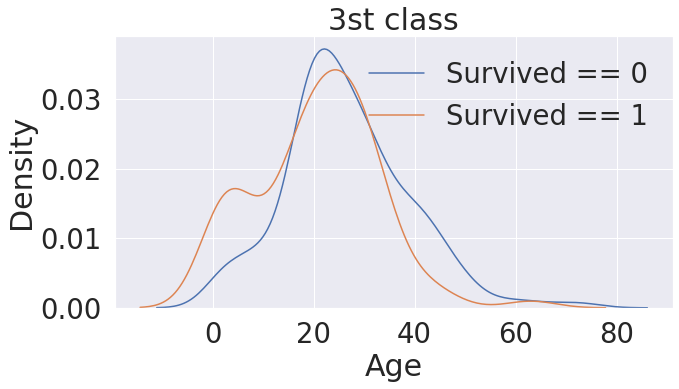

In [51]:
#생존, 사망 한사람들 중 pclass가 3인것 찾기.
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 3)]['Age'], ax=ax) #이거 그리는 공식있
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 3)]['Age'], ax=ax)
plt.legend(['Survived == 0', 'Survived == 1'])
plt.title('3st class')
plt.show()

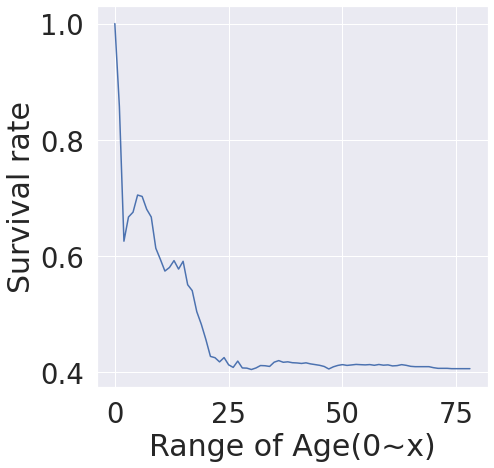

In [52]:
change_age_cumulate_survival_ratio = [] #나이를 다르게 했을때 생존률이 어캐달라지는지

for i in range(1, 80):
    change_age_cumulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(change_age_cumulate_survival_ratio)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

In [53]:
i = 10
df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']) #생존률을 알수있다.

0.6129032258064516

In [54]:
df_train[df_train['Age'] < i]['Survived'].sum()

38

In [55]:
len(df_train[df_train['Age'] < i]['Survived']) 

62